This notebook uses the `develop` branch of `darts`, in order to take advantage of model re-training

In [1]:
import sys

import matplotlib.pyplot as plt
import json

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

# try:
#     from private.lyap import lyap_r, lyap_e, corr_dim
# except:
#     from nolds import lyap_r, lyap_e, corr_dim

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:

for equation_name in equation_data.dataset:
    
    print(equation_name, flush=True)

    with open(output_path, 'w') as f:
        json.dump(all_hyperparameters, f, indent=4)   

In [ ]:
output_path = ""

In [96]:
    print(n_ic * traj_len * n_iters* epoch_count)
    print(full_epoch_count * 1000)

400000
400000


Saving data to:  /Users/williamgilpin/program_repos/dysts/benchmarks/results/importance_sampling.json
10 points sampled per iteration, with trajectory length 100, for a total of 20 iterations of length 20
400000
400000
Aizawa 0


[2021-06-30 21:57:28,239] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 21:57:28,239] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


0.6871950603001816


[2021-06-30 21:59:33,681] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 21:59:33,681] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 21:59:42,553] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 21:59:42,553] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 21:59:51,470] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 21:59:51,470] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:00:00,487] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:00:00,487] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:00:10,045] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:00:10,045] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:00:18,497] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:00:18,497] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:00:27,725] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:00:27,725] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:00:37,196] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:00:37,196] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:00:46,925] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:00:46,925] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:00:56,083] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:00:56,083] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:01:05,255] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:01:05,255] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:01:13,988] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:01:13,988] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:01:22,958] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:01:22,958] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:01:31,482] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:01:31,482] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:01:40,126] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:01:40,126] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:01:49,028] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:01:49,028] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:01:57,510] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:01:57,510] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:02:05,808] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:02:05,808] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:02:13,872] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:02:13,872] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:02:21,911] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:02:21,911] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19
0.6021738492229528


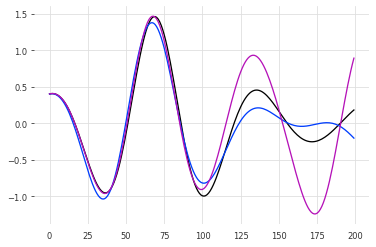

AnishchenkoAstakhov 1


[2021-06-30 22:02:30,382] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:02:30,382] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


1.4928008550386034


[2021-06-30 22:04:27,728] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:04:27,728] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 22:04:36,354] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:04:36,354] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:04:44,646] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:04:44,646] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:04:52,863] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:04:52,863] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:05:01,265] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:01,265] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:05:09,841] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:09,841] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:05:18,551] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:18,551] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:05:27,136] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:27,136] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:05:35,243] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:35,243] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:05:43,284] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:43,284] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:05:51,176] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:51,176] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:05:59,170] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:05:59,170] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:06:07,700] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:06:07,700] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:06:15,712] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:06:15,712] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:06:23,985] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:06:23,985] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:06:32,305] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:06:32,305] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:06:40,219] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:06:40,219] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:06:48,228] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:06:48,228] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:06:56,110] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:06:56,110] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:07:04,038] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:07:04,038] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19
1.1571854774028387


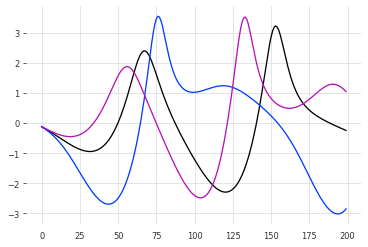

Arneodo 2


[2021-06-30 22:07:12,230] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:07:12,230] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


0.2418312061053734


[2021-06-30 22:09:03,969] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:03,969] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 22:09:11,784] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:11,784] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:09:19,605] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:19,605] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:09:27,415] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:27,415] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:09:35,209] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:35,209] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:09:43,042] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:43,042] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:09:50,909] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:50,909] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:09:58,716] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:09:58,716] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:10:06,518] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:10:06,518] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:10:14,362] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:10:14,362] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:10:22,182] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:10:22,182] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:10:30,036] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:10:30,036] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:10:37,892] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:10:37,892] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:10:45,745] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:10:45,745] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:10:53,568] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:10:53,568] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:11:01,374] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:11:01,374] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:11:09,183] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:11:09,183] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:11:17,025] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:11:17,025] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:11:24,872] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:11:24,872] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:11:32,660] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:11:32,660] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19
0.8260225673142876


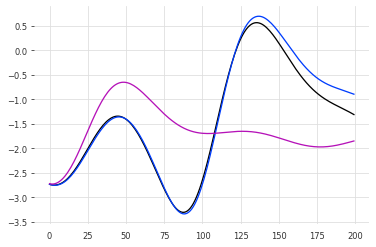

ArnoldBeltramiChildress 3


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:11:40,790] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:11:40,790] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


1.4398339915079612


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:13:31,911] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:13:31,911] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 22:13:39,691] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:13:39,691] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:13:47,495] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:13:47,495] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:13:55,331] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:13:55,331] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:14:03,297] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:03,297] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:14:11,081] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:11,081] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:14:18,939] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:18,939] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:14:26,746] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:26,746] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:14:34,587] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:34,587] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:14:42,392] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:42,392] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:14:50,242] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:50,242] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:14:58,078] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:14:58,078] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:15:05,895] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:15:05,895] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:15:13,718] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:15:13,718] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:15:21,544] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:15:21,544] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:15:29,430] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:15:29,430] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:15:37,280] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:15:37,280] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:15:45,106] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:15:45,106] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:15:52,901] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:15:52,901] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:16:00,757] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:16:00,757] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19
1.4231449230860653


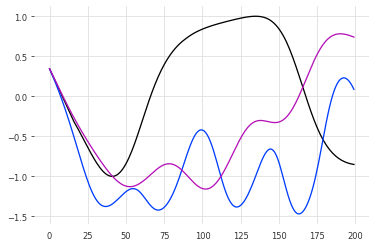

ArnoldWeb 4


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:16:08,978] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:16:08,978] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


0.9846697263223697


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:18:00,795] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:00,795] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 22:18:08,702] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:08,702] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:18:16,694] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:16,694] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:18:24,618] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:24,618] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:18:32,513] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:32,513] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:18:40,472] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:40,472] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:18:48,448] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:48,448] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:18:56,358] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:18:56,358] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:19:04,389] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:04,389] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:19:12,259] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:12,259] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:19:20,233] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:20,233] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:19:28,179] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:28,179] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:19:36,087] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:36,087] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:19:44,009] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:44,009] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:19:51,886] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:51,886] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:19:59,763] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:19:59,763] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:20:07,761] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:20:07,761] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:20:15,724] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:20:15,724] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:20:23,838] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:20:23,838] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:20:31,797] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:20:31,797] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19
0.43086855560126663


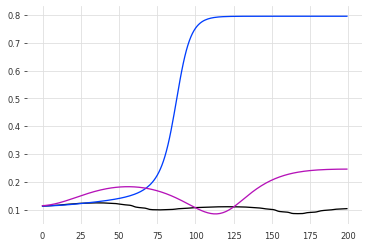

BeerRNN 5


[2021-06-30 22:20:40,347] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:20:40,347] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


0.4360069110148229
0


[2021-06-30 22:22:32,178] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:22:32,178] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:22:40,321] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:22:40,321] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:22:48,466] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:22:48,466] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:22:56,626] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:22:56,626] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:23:04,767] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:23:04,767] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:23:12,944] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:23:12,944] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:23:21,100] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:23:21,100] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:23:29,238] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:23:29,238] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:23:37,395] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:23:37,395] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:23:45,576] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:23:45,576] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:23:53,727] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:23:53,727] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:24:01,853] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:01,853] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:24:09,977] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:09,977] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:24:18,115] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:18,115] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:24:26,265] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:26,265] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:24:34,421] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:34,421] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:24:42,568] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:42,568] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:24:50,763] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:50,763] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:24:58,913] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:24:58,913] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19


[2021-06-30 22:25:07,079] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:25:07,079] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0.3921402151861708


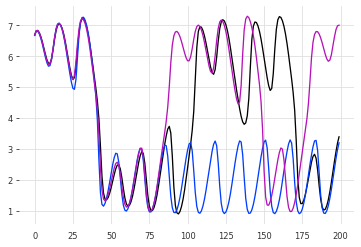

BelousovZhabotinsky 6


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)
[2021-06-30 22:25:15,446] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:25:15,446] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


1.8456352937777751


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)
[2021-06-30 22:27:07,256] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:27:07,256] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 22:27:15,253] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:27:15,253] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:27:23,203] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:27:23,203] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:27:31,135] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:27:31,135] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:27:39,078] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:27:39,078] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:27:47,062] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:27:47,062] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:27:55,020] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:27:55,020] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:28:02,958] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:28:02,958] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:10,902] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:10,902] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:28:18,897] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:18,897] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9
10


[2021-06-30 22:28:27,066] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:27,066] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:35,014] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:35,014] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:28:42,962] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:42,962] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:28:50,956] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:50,956] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:28:58,937] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:28:58,937] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:29:06,865] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:29:06,865] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:29:14,840] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:29:14,840] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:29:22,779] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:29:22,779] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:29:30,740] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:29:30,740] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:29:38,704] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19


[2021-06-30 22:29:38,704] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1.2779684440791785


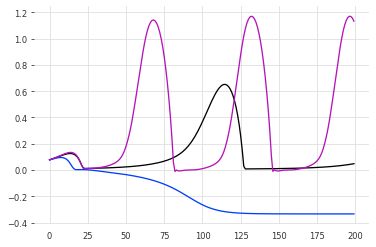

BickleyJet 7


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:29:46,853] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:29:46,853] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


0.453691995934401


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:31:38,336] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:31:38,336] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 22:31:46,144] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:31:46,144] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:31:53,917] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:31:53,917] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:32:01,759] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:01,759] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:32:09,588] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:09,588] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:32:17,469] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:17,469] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:32:25,289] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:25,289] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:32:33,110] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:33,110] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:32:40,970] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:40,970] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:32:48,828] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:48,828] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:32:56,687] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:32:56,687] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:33:04,518] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:04,518] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:33:12,361] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:12,361] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:33:20,255] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:20,255] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:33:28,090] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:28,090] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:33:35,988] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:35,988] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:33:43,813] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:43,813] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:33:51,650] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:51,650] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:33:59,468] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:33:59,468] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:34:07,325] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:34:07,325] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19
0.4635087422943133


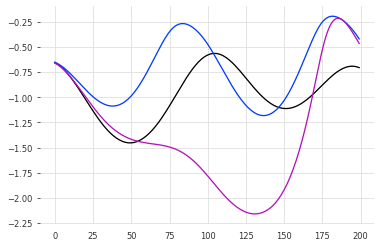

Blasius 8


[2021-06-30 22:34:15,585] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:34:15,585] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


0.15631394108764404


[2021-06-30 22:36:08,527] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:36:08,527] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0


[2021-06-30 22:36:16,510] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:36:16,510] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:36:24,612] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:36:24,612] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:36:32,578] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:36:32,578] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:36:40,525] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:36:40,525] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:36:48,463] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:36:48,463] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:36:56,310] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:36:56,310] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:37:04,187] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:04,187] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:37:12,068] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:12,068] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:37:19,957] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:19,957] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:37:27,865] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:27,865] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:37:35,766] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:35,766] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:37:43,708] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:43,708] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:37:51,572] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:51,572] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:37:59,507] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:37:59,507] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:38:07,419] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:38:07,419] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:38:15,318] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:38:15,318] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:38:23,204] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:38:23,204] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:38:31,140] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:38:31,140] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:38:39,025] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:38:39,025] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19
0.41372565746981016


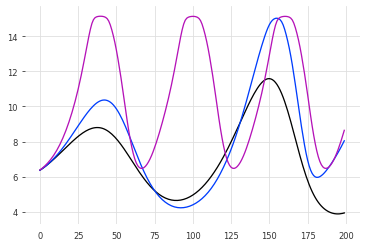

BlinkingRotlet 9


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:38:47,367] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:38:47,367] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


1.0858541157150232
0


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:40:38,770] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:40:38,770] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:40:46,898] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:40:46,898] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:40:54,930] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:40:54,930] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:41:03,066] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:03,066] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:41:11,109] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:11,109] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:41:19,241] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:19,241] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:41:27,410] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:27,410] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:41:35,523] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:35,523] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


8


[2021-06-30 22:41:43,614] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:43,614] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


9


[2021-06-30 22:41:51,713] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:51,713] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:41:59,685] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


10


[2021-06-30 22:41:59,685] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


11


[2021-06-30 22:42:07,644] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:42:07,644] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


12


[2021-06-30 22:42:15,754] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:42:15,754] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


13


[2021-06-30 22:42:23,788] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:42:23,788] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


14


[2021-06-30 22:42:31,938] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:42:31,938] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


15


[2021-06-30 22:42:40,057] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:42:40,057] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


16


[2021-06-30 22:42:48,284] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:42:48,284] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


17


[2021-06-30 22:42:56,409] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:42:56,409] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


18


[2021-06-30 22:43:04,422] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:43:04,422] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


19


[2021-06-30 22:43:12,548] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:43:12,548] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


0.7785277054133237


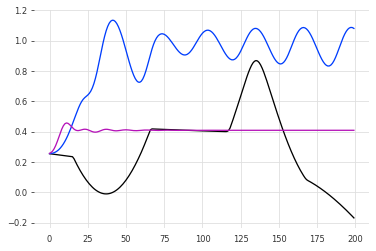

BlinkingVortex 10


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:43:21,075] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.
[2021-06-30 22:43:21,075] INFO | darts.models.torch_forecasting_model | Train dataset contains 975 samples.


1.2339444967464264
0


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
[2021-06-30 22:45:14,568] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:45:14,568] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


1


[2021-06-30 22:45:23,519] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:45:23,519] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


2


[2021-06-30 22:45:31,971] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:45:31,971] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


3


[2021-06-30 22:45:40,428] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:45:40,428] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


4


[2021-06-30 22:45:50,786] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:45:50,786] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


5


[2021-06-30 22:45:59,907] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:45:59,907] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


6


[2021-06-30 22:46:09,588] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:46:09,588] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


7


[2021-06-30 22:46:19,151] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.
[2021-06-30 22:46:19,151] INFO | darts.models.torch_forecasting_model | Train dataset contains 750 samples.


In [ ]:
## Define a model that predicts a time series, given its previous values


import pandas as pd
from scipy.signal import savgol_filter
import json

import darts 
from darts import TimeSeries
from darts.models import RNNModel

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *


full_epoch_count = 400
forecast_length = 200

hyperparams = {
    "input_chunk_length": 25, 
    "output_chunk_length": 1, 
    "model": "LSTM", 
    "n_rnn_layers": 2, 
    "random_state": 0
}

results = dict()

# cwd = os.path.dirname(os.path.realpath(__file__))
cwd = os.getcwd()
output_path = cwd + "/results/importance_sampling.json"
print("Saving data to: ", output_path)

# equation_name = "SprottA"


n_iters = 2 * 10
epoch_count = 2 * 10
n_ic = 5 * 2 * full_epoch_count// (n_iters * epoch_count)  # model retraining is not currently working in darts
traj_len =  1000 // n_ic
print(f"{n_ic} points sampled per iteration, with trajectory length {traj_len}, for a total of {n_iters} iterations of length {epoch_count}")
print(n_ic * traj_len * n_iters* epoch_count)
print(full_epoch_count * 1000)



for equation_ind, equation_name in enumerate(get_attractor_list()):
    np.random.seed(0)
    
    print(f"{equation_name} {equation_ind}", flush=True)
    results[equation_name] = dict()

    equation = getattr(dysts.flows, equation_name)()
    if hasattr(equation, "delay"):
        if equation.delay: 
            continue
    sol = equation.make_trajectory(1200, resample=True)
    y_train, y_test = sol[:-forecast_length, 0], sol[-forecast_length:, 0]
    y_train_ts = TimeSeries.from_dataframe(pd.DataFrame(y_train))
    results[equation_name]["true_value"] = y_test.tolist()

    try:
        del model
    except:
        pass
    model = RNNModel(**hyperparams)
    # hyperparams = {"input_chunk_length": 50, "output_chunk_length": 1}
    # model = NBEATSModel(**hyperparams)
    model.fit(y_train_ts, epochs=full_epoch_count)

    y_val_pred = model.predict(forecast_length)
    y_val_pred = np.squeeze(y_val_pred.values())
    score = mean_absolute_percentage_error(y_test, y_val_pred, symmetric=True)
    print(score)
    plt.figure()
    plt.plot(y_test)
    plt.plot(y_val_pred)
    
    results[equation_name]["prediction_value"] = y_val_pred.tolist()
    

    pred_backtest = model.historical_forecasts(y_train_ts, retrain=False, start=(1 + model.input_chunk_length)).values()
    # model = RNNModel(50, 1, model="LSTM", n_rnn_layers=2, n_epochs=epoch_count)
    model = RNNModel(**hyperparams)
    # model = NBEATSModel(**hyperparams)
    for i in range(n_iters):
        print(i)

        y_train_backtest = y_train_ts.values()[-len(pred_backtest):]
        mse_back = np.squeeze(np.sqrt((pred_backtest - y_train_backtest)**2))
        sample_probs = savgol_filter(mse_back, 21, 3)
        sample_probs[sample_probs<0] = 0
        sample_probs /= np.sum(sample_probs)

        ic_indices = np.random.choice(np.arange(len(y_train_backtest)), n_ic, p=sample_probs, replace=True)
        #ic_indices = np.random.choice(np.arange(len(y_train_backtest)), n_ic)

        ic_vals = sol[ic_indices] + 1e-3 * (np.random.random(sol[ic_indices].shape) - 0.5)
        equation.ic = ic_vals
        new_sol = equation.make_trajectory(traj_len, resample=True)
        y_train_list = list(new_sol[..., 0])
        y_train_list = [TimeSeries.from_dataframe(pd.DataFrame(item)) for item in y_train_list]
        model.fit(y_train_list, epochs=epoch_count)
        pred_backtest = model.historical_forecasts(y_train_ts, retrain=False, start=(1 + model.input_chunk_length)).values()

    y_val_pred = model.predict(forecast_length, series=y_train_ts)
    y_val_pred = np.squeeze(y_val_pred.values())
    score = mean_absolute_percentage_error(y_test, y_val_pred, symmetric=True)
    print(score)
    plt.plot(y_val_pred)
    plt.show()

    results[equation_name]["prediction_adaptive"] = y_val_pred.tolist()
    
    

    with open(output_path, 'w') as f:
        json.dump(results, f, indent=4)   

In [129]:
random_state

NameError: name 'random_state' is not defined

In [35]:
2 * full_epoch_count// (n_iters * epoch_count) 

8

In [31]:
full_epoch_count// (n_iters * epoch_count)

4

In [34]:
10 * 8 * 250 * 20

400000

In [24]:
1 round, 1 time series, length 1000, for 400 steps

10 rounds, 4 time series, length 250, for 20 steps

10 rounds, 8 time series, length 250, for 20 steps

250

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
true_value 0.0
prediction_value 1.2151159288530988
prediction_adaptive 0.7504348565671389


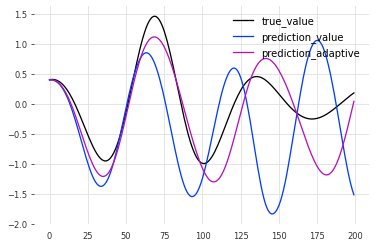

In [124]:

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

all_labels = list()
for item in results["Aizawa"]:
    score = mean_absolute_percentage_error(results["Aizawa"]["true_value"], results["Aizawa"][item], symmetric=True)
    all_labels.append(item)
    plt.plot(results["Aizawa"][item])
    print(item, score)
plt.legend(all_labels)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


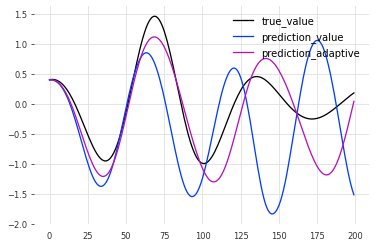

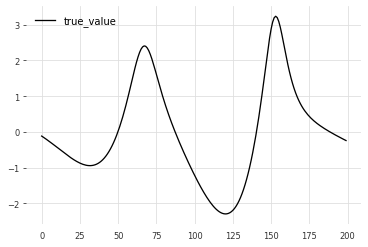

In [125]:

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

all_scores = dict()
for equation_name in results.keys():
    all_scores[equation_name] = dict()
    plt.figure()
    all_labels = list()
    for item in results[equation_name]:
        all_labels.append(item)
        plt.plot(results[equation_name][item])
        score = mean_absolute_percentage_error(results[equation_name]["true_value"], results[equation_name][item], symmetric=True)
        all_scores[equation_name][item] = score
    plt.legend(all_labels)


In [122]:
score_vals = list()
for item in all_scores:
    try:
        score_vals.append((all_scores[item]["prediction_value"], all_scores[item]["prediction_adaptive"]))
    except KeyError:
        pass
score_vals = np.array(score_vals)

print(np.mean(score_vals, axis=0))
print(np.median(score_vals, axis=0))

[0.99546551 0.67776267]
[0.99546551 0.67776267]


8 points sampled per iteration, for a total of 10 iterations of length 5
0


[2021-06-30 04:00:17,051] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:00:17,051] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


1


[2021-06-30 04:00:24,994] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:00:24,994] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


2


[2021-06-30 04:00:33,292] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:00:33,292] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


3


[2021-06-30 04:00:41,021] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:00:41,021] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


4


[2021-06-30 04:00:48,496] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:00:48,496] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


5


[2021-06-30 04:00:56,368] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:00:56,368] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


6


[2021-06-30 04:01:03,937] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:01:03,937] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


7


[2021-06-30 04:01:11,533] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:01:11,533] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


8


[2021-06-30 04:01:19,300] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:01:19,300] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


9


[2021-06-30 04:01:26,816] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.
[2021-06-30 04:01:26,816] INFO | darts.models.torch_forecasting_model | Train dataset contains 950 samples.


1.0436703912213863


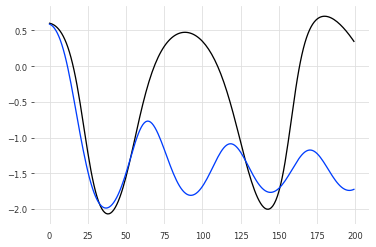

In [ ]:
0.5482721423192519

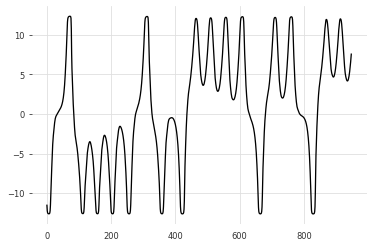

In [69]:
plt.plot(pred_backtest)

In [ ]:
ForcedFitzHughNagumo

+ sample new ic along bad directions

Compute jacobian of trajectories, and sample along direction of LLE


In [111]:
y_train_list[0].shape

(1000,)

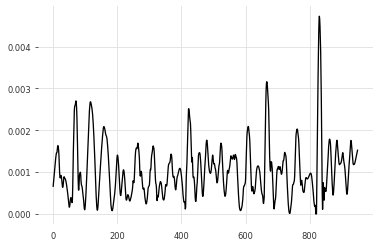

In [89]:


plt.plot(sample_probs)

In [13]:
# ?model.historical_forecasts

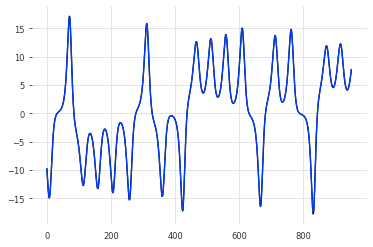

In [27]:
plt.plot(y_train_backtest)
plt.plot(pred_backtest)

## Dev code

In [ ]:
##

def adversarial_training(model, traj, n_iters, epochs_per_iter, samples_per_iter, null_sample=False):
    """
    model (darts.model): A dynamical system model
    traj (np.ndarray): A T x D trajectory of the dynamical system
    """
    sol = equation.make_trajectory(1000, resample=True)
    pred_backtest = model.historical_forecasts(y_train_ts, retrain=False, start=(1 + model.input_chunk_length)).values()
    for i in range(n_iters):
        y_train_backtest = y_train_ts.values()[-len(pred_backtest):]
        # plt.plot(smape_indexwise(pred_backtest, y_train_backtest))
        mse_back = np.squeeze(np.sqrt((pred_backtest - y_train_backtest)**2))
        sample_probs = savgol_filter(mse_back, 21, 3)
        sample_probs[sample_probs<0] = 0
        sample_probs /= np.sum(sample_probs)

        if null_sample:
            ic_indices = np.random.choice(np.arange(len(y_train_backtest)), n_ic)
        else:
            ic_indices = np.random.choice(np.arange(len(y_train_backtest)), n_ic, p=sample_probs, replace=True)

        ic_vals = sol[ic_indices] + 1e-3 * (np.random.random(sol[ic_indices].shape) - 0.5)
        equation.ic = ic_vals
        new_sol = equation.make_trajectory(1000, resample=True)
        y_train_list = list(new_sol[..., 0])
        y_train_list = [TimeSeries.from_dataframe(pd.DataFrame(item)) for item in y_train_list]
        model.fit(y_train_ts, epochs=epoch_count)
        pred_backtest = model.historical_forecasts(y_train_ts, retrain=False, start=(1 + model.input_chunk_length)).values()
    
    return model